# Model 004 basicSs

Charlie Shobe

This model has stream power (shear stress formulation) and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-KA^{1/3}S^{2/3}$$
and
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

So, at steady state, the landscape will obey:
$$S=\left(\frac{U}{KA^{1/3}}\right)^{1/(2/3)}$$
when only the fluvial rule is in place ($D=0$).

In [3]:
from terrainbento import Basic
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [4]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sp' : 0.001,
          'm_sp' : 1./3.,
          'n_sp' : 2./3.,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'output_filename': 'model_000_output'
}

In [5]:
#instantiate and establish topo error tolerance
basic = Basic(params=params)
tolerance = 0.0001

In [6]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    basic.run_one_step(dt)
    #    ld.run_one_step(dt = dt)
    #basic.grid.at_node['topographic__elevation'][basic.grid.boundary_nodes] -= uplift_rate * dt
    post_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print(elapsed_time)
        print(max(abs(pre_topo - post_topo)))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
0.0533611464409
1000
0.00529039909723
2000
0.00481041710235
3000
0.0090719083504
4000
0.00559568120274
5000
0.00491701610446
6000
0.00468878624637
7000
0.00528470589078
8000
0.00600098794351
9000
0.00513780682396
10000
0.0053370217487
11000
0.00460125872586
12000
0.00477720476852
13000
0.00648388580196
14000
0.00428580090126
15000
0.00432445659836
16000
0.0044507222311
17000
0.00472675422857
18000
0.00553591296895
19000
0.00491377001225
20000
0.00428569318908
21000
0.00529445153479
22000
0.00392768679317
23000
0.00534921974274
24000
0.00404247644322
25000
0.0034777619854
26000
0.00843434921207
27000
0.00435303497558
28000
0.00499258422162
29000
0.00411356413784
30000
0.00704128224007
31000
0.00449215085716
32000
0.00499354259211
33000
0.00720152940279
34000
0.0048940809439
35000
0.00555219873896
36000
0.004973098017
37000
0.00454835742493
38000
0.00436432205399
39000
0.00612869154669
40000
0.00503866930944
41000
0.00532513646136
42000
0.00390288304507
43000
0.00577294699262
44000
0.0

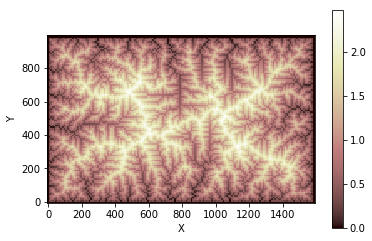

In [7]:
%matplotlib inline
imshow_grid(basic.grid, 'topographic__elevation')

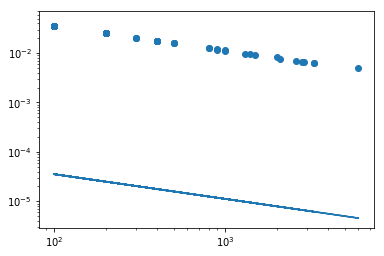

In [8]:
#for some reason, the line of nodes adjacent to all the boundaries needs cut
plt.scatter(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)])
plt.plot(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], np.power((0.00005 / 0.01), 1/(2./3))*np.power(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], (-1./3) /(2./3) ))
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.0005, 0.01)

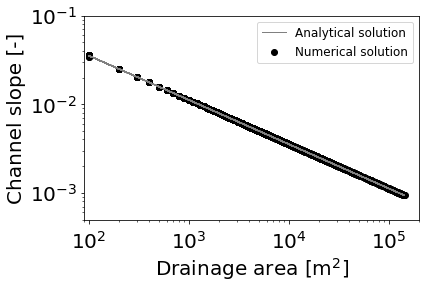

In [19]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = basic.grid.at_node['drainage_area'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]
slope_array = basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 1./3. #discharge exponent
n = 2./3. #slope exponent

#calculate analytical slope from area field
analytical_slope_array = np.power((u / k), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Analytical solution')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical solution') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 2*10**5)
slope_area.set_ylim(5e-4, 1e-1)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('shear_stress_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

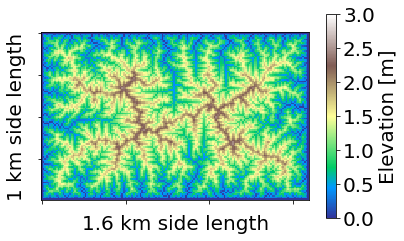

In [16]:
##MAKE TOPO FIGURE
#define 'topo'
topo = basic.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 3)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('shear_stress_topo.eps',bbox_inches='tight', dpi=300)

In [15]:
topo

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.35855339,  0.35855339, ...,  0.35855339,
         0.35855339,  0.        ],
       [ 0.        ,  0.255     ,  0.60855339, ...,  0.60855339,
         0.255     ,  0.        ],
       ..., 
       [ 0.        ,  0.35855339,  0.6817767 , ...,  0.70912415,
         0.35855339,  0.        ],
       [ 0.        ,  0.35855339,  0.35855339, ...,  0.35855339,
         0.35855339,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])